# CoinAPI data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
coins = pd.read_json('./data/coins.json.gz')
coins['time_coinapi'] = pd.to_datetime(coins['time_coinapi'])
coins['time_exchange'] = pd.to_datetime(coins['time_exchange'])

## Data information

|Variable|Description|
|---|---|
|type|Message type, always `trade`|
|symbol_id|Symbol identifier|
|sequence|Sequence number per pair (`type`, `symbol_id`) which is valid only for the lifespan of the connection.|
|time_exchange|Time of trade reported by exchange|
|time_coinapi|Time when coinapi first received trade from exchange|
|uuid|Our unique trade identifier in form of UUIDv4|
|price|Price of the transaction|
|size|Base asset amount traded in transaction|
|taker_side|Aggressor side of the transaction _(BUY/SELL/BUY_ESTIMATED/SELL_ESTIMATED/UNKNOWN)_|

In [4]:
coins.head(3)

,price,sequence,size,symbol_id,taker_side,time_coinapi,time_exchange,type,uuid
0,0.000102,129427,1198.9512,BITZ_SPOT_TRX_ETH,BUY,2018-11-20 10:38:57.034459600,2018-11-20 10:38:04,trade,665c9da9-9817-483e-a0b2-71fa269e6669
1,0.000102,129428,989.8826,BITZ_SPOT_TRX_ETH,BUY,2018-11-20 10:38:57.034459600,2018-11-20 10:38:04,trade,d079094d-af12-4a3f-92cb-8f771c10931c
2,0.000102,129429,7104.0000,BITZ_SPOT_TRX_ETH,BUY,2018-11-20 10:38:57.034459600,2018-11-20 10:38:04,trade,dedbe422-54b1-47f9-baa5-691d9029e72e


In [46]:
start = coins['time_coinapi'].min()
end = coins['time_coinapi'].max()

sec = (end-start).total_seconds()
record_count = len(coins.index)

print("Start\t",start, 'until', end, "(diff: {0:.2f} minutes)".format(sec/60))
print("Records\t", len(coins.index), "({0:.0f} per second)".format(record_count/sec))

Start	 2018-11-20 10:38:24.752468200 until 2018-11-20 10:48:59.661872400 (diff: 10.58 minutes)
Records	 316233 (498 per second)


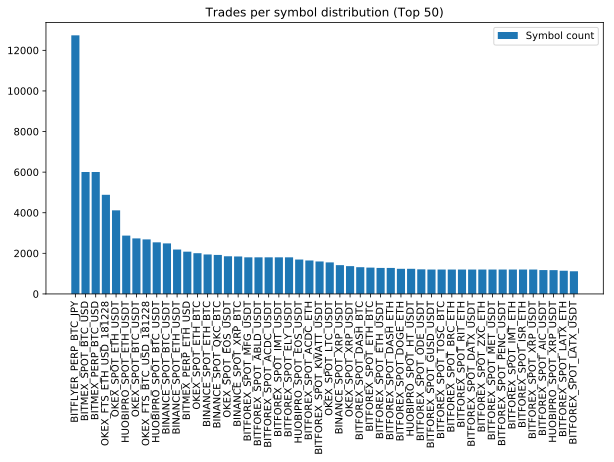

In [10]:
coins['symbol_id'].value_counts();

fig, ax = plt.subplots(figsize=(10, 5))

values = coins['symbol_id'].value_counts()

limit = 50
values = values[0:limit]

x = values.index

index = np.arange(len(x))

y = values.values

ax.bar(index, y, label='Symbol count')
ax.set_xticklabels(x, rotation='vertical')
ax.set_xticks(index)
plt.title(f"Trades per symbol distribution (Top {limit})")
plt.legend();

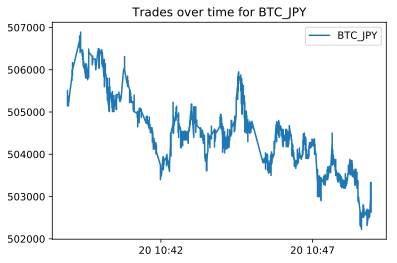

In [28]:
BTC_JPY = coins[coins['symbol_id'] == 'BITFLYER_PERP_BTC_JPY']
y = BTC_JPY['price'].values
x = BTC_JPY['time_exchange'].values
plt.plot(x,y, label='BTC_JPY')
plt.title('Trades over time for BTC_JPY')
plt.legend();